Assignment_1 AWS Pipeline Architecture-Team 6


In [0]:
# Architectural Components:
# S3 Bucket: https://aws.amazon.com/s3/
# Kinesis Data Stream: https://aws.amazon.com/kinesis/data-streams/
# Kinesis Delivery Stream: https://aws.amazon.com/kinesis/data-firehose/
# Redshift Cluster: https://aws.amazon.com/redshift/
# IAM Policy: https://aws.amazon.com/iam/
# IAM Role: https://aws.amazon.com/iam/

<img src="AWS_GAP_Architecture_New.jpg">

In [0]:
!pip install boto3

    100% |████████████████████████████████| 133kB 5.6MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 9.2MB/s eta 0:00:01
    100% |████████████████████████████████| 5.6MB 5.4MB/s eta 0:00:01


In [0]:
!pip install psycopg2

    100% |████████████████████████████████| 378kB 11.8MB/s ta 0:00:01
    Complete output from command python setup.py egg_info:
    running egg_info
    creating pip-egg-info/psycopg2.egg-info
    writing pip-egg-info/psycopg2.egg-info/PKG-INFO
    writing dependency_links to pip-egg-info/psycopg2.egg-info/dependency_links.txt
    writing top-level names to pip-egg-info/psycopg2.egg-info/top_level.txt
    writing manifest file 'pip-egg-info/psycopg2.egg-info/SOURCES.txt'
    
    Error: pg_config executable not found.
    
    pg_config is required to build psycopg2 from source.  Please add the directory
    containing pg_config to the $PATH or specify the full executable path with the
    option:
    
        python setup.py build_ext --pg-config /path/to/pg_config build ...
    
    or with the pg_config option in 'setup.cfg'.
    
    If you prefer to avoid building psycopg2 from source, please install the PyPI
    'psycopg2-binary' package instead.
    
    For further information

In [1]:
#Importing all required libraries:
#pip install boto3
#pip install psycopg2

import boto3
import json
import psycopg2
import datetime

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [0]:
#Setting up the AWS Access keys:
#NOTE: DO NOT EXPOSE THE ACCESS & SECRET KEYS

config_file = open(r'Config.json')
config_file = json.loads(config_file.read())

access_key = config_file['access_key']
secret_access_key = config_file['secret_access_key']


In [0]:
#Configuration Parameters:

bucket_name = "info7374s3assignment2"#------------------------------------S3: Name of the creating AWS S3 Bucket

policy_name = "info7374policyassignment2"#----------------------------------IAM: Access policy name
iam_role_name = "info7374roleassignment2"#----------------------------------IAM: IAM Role for the architecural access

db_name = "info7374dbassignment2"#-------------------------------------Redshift: Database Name for gaming data
cluster_identifier = "info7374clusterassignment2"#---------------------Redshift: Redshift Cluster Name
master_username = "root"#----------------------------------------Redshift: Admin Username
master_password = "Info7374gap"#---------------------------------Redshift: Admin Password
node_type = "dc2.large"#-----------------------------------------Redshift: Cluster configuration
cluster_type = "single-node"#------------------------------------Redshift: Cluster Type
availability_zone = "us-east-1a"#--------------------------------Redshift: Cluster Availability Zone
table_name = "info7374_game"#------------------------------------Redshift: Database table name
kinesis_data_stream_name = "info7374datastreamassignment2"#-------------Kinesis: Data Stream Name
shard_count = 100#------------------------------------------------Kinesis: Data Stream Shard Count

log_group_name = "info7374loggroupassignment2"#------------------------CloudWatch: Log Group Name
log_stream_name = "info7374logstreamassignment2"#------------------------CloudWatch: Log Group Name
delivery_stream_name = "info7374deliverystreamassignment2"#--------------Kinesis: Delivery Stream Name
stream_type = "KinesisStreamAsSource"#-----------------------------Kinesis: Delivery Stream Type


In [4]:
#Creating AWS S3 Bucket:

s3_client = boto3.client('s3', aws_access_key_id = access_key, aws_secret_access_key = secret_access_key)

response_s3 = s3_client.create_bucket(ACL="private", Bucket=bucket_name)
print(response_s3)

{'ResponseMetadata': {'RequestId': '53EA0123CD60052C', 'HostId': 'gHKgk3SOgp0L81709VxWbQxKpG046nL5/2iREJLVrOez5ZX9+jMqIXM1M5+bOAwj034423xMvS4=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'gHKgk3SOgp0L81709VxWbQxKpG046nL5/2iREJLVrOez5ZX9+jMqIXM1M5+bOAwj034423xMvS4=', 'x-amz-request-id': '53EA0123CD60052C', 'date': 'Fri, 26 Jul 2019 18:24:49 GMT', 'location': '/info7374s3assignment2', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'Location': '/info7374s3assignment2'}


In [5]:
bucket_arn = "arn:aws:s3:::"+bucket_name#---------------------------S3: Bucker ARN
print(bucket_arn)

arn:aws:s3:::info7374s3assignment2


In [0]:
#Creating IAM Policy for Architecural access:

iam_client = boto3.client('iam', aws_access_key_id = access_key, aws_secret_access_key = secret_access_key)


In [0]:

policy_details = {
    "Version": "2012-10-17",
    "Statement": [
        {
            "Sid": "",
            "Effect": "Allow",
            "Action": [
                "glue:GetTableVersions"
            ],
            "Resource": "*"
        },
        {
            "Sid": "",
            "Effect": "Allow",
            "Action": [
                "s3:AbortMultipartUpload",
                "s3:GetBucketLocation",
                "s3:GetObject",
                "s3:ListBucket",
                "s3:ListBucketMultipartUploads",
                "s3:PutObject"
            ],
            "Resource": "*"
        },
        {
            "Sid": "",
            "Effect": "Allow",
            "Action": [
                "lambda:InvokeFunction",
                "lambda:GetFunctionConfiguration"
            ],
            "Resource": "*"
        },
        {
            "Sid": "",
            "Effect": "Allow",
            "Action": [
                "logs:PutLogEvents"
            ],
            "Resource": "*"
        },
        {
            "Sid": "",
            "Effect": "Allow",
            "Action": [
                "kinesis:DescribeStream",
                "kinesis:GetShardIterator",
                "kinesis:GetRecords"
            ],
            "Resource": "*"
        },
        {
            "Effect": "Allow",
            "Action": [
                "kms:Decrypt"
            ],
            "Resource": "*"
        }
    ]
}

In [17]:
response_iam_policy = iam_client.create_policy(PolicyName=policy_name, PolicyDocument=json.dumps(policy_details))
print(response_iam_policy)

{'Policy': {'PolicyName': 'info7374policyassignment2', 'PolicyId': 'ANPATOYZ5O3IRMKTCX55H', 'Arn': 'arn:aws:iam::237888173777:policy/info7374policyassignment2', 'Path': '/', 'DefaultVersionId': 'v1', 'AttachmentCount': 0, 'PermissionsBoundaryUsageCount': 0, 'IsAttachable': True, 'CreateDate': datetime.datetime(2019, 7, 26, 18, 25, 50, tzinfo=tzlocal()), 'UpdateDate': datetime.datetime(2019, 7, 26, 18, 25, 50, tzinfo=tzlocal())}, 'ResponseMetadata': {'RequestId': 'cbabaedb-afd2-11e9-b4fa-8dbf2e7c63c0', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'cbabaedb-afd2-11e9-b4fa-8dbf2e7c63c0', 'content-type': 'text/xml', 'content-length': '785', 'date': 'Fri, 26 Jul 2019 18:25:50 GMT'}, 'RetryAttempts': 0}}


In [18]:
policy_arn = response_iam_policy['Policy']['Arn']#------------------------IAM: Policy ID for assignment
print(policy_arn)

arn:aws:iam::237888173777:policy/info7374policyassignment2


In [20]:
#Creating IAM Role for Architectural access:

assume_role_policy_doc = {
  "Version": "2012-10-17",
  "Statement": [
    {
      "Sid": "",
      "Effect": "Allow",
      "Principal": {
        "Service": "firehose.amazonaws.com"
      },
      "Action": "sts:AssumeRole",
      "Condition": {
        "StringEquals": {
          "sts:ExternalId": "237888173777"
        }
      }
       
    }
  ]
}

response_iam_role = iam_client.create_role(RoleName=iam_role_name, AssumeRolePolicyDocument=json.dumps(assume_role_policy_doc))

print(response_iam_role)

{'Role': {'Path': '/', 'RoleName': 'info7374roleassignment2', 'RoleId': 'AROATOYZ5O3IQCE4TUHGY', 'Arn': 'arn:aws:iam::237888173777:role/info7374roleassignment2', 'CreateDate': datetime.datetime(2019, 7, 26, 18, 26, 17, tzinfo=tzlocal()), 'AssumeRolePolicyDocument': {'Version': '2012-10-17', 'Statement': [{'Sid': '', 'Effect': 'Allow', 'Principal': {'Service': 'firehose.amazonaws.com'}, 'Action': 'sts:AssumeRole', 'Condition': {'StringEquals': {'sts:ExternalId': '237888173777'}}}]}}, 'ResponseMetadata': {'RequestId': 'dbb81d61-afd2-11e9-b4fa-8dbf2e7c63c0', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'dbb81d61-afd2-11e9-b4fa-8dbf2e7c63c0', 'content-type': 'text/xml', 'content-length': '938', 'date': 'Fri, 26 Jul 2019 18:26:16 GMT'}, 'RetryAttempts': 0}}


In [0]:
role_arn = response_iam_role['Role']['Arn']#----------------------------IAM: Role ARN

In [22]:
#Attaching a Policy to a Role:

response_iam_role_policy_attach = iam_client.attach_role_policy(PolicyArn=policy_arn,RoleName=iam_role_name)
print(response_iam_role_policy_attach)

{'ResponseMetadata': {'RequestId': 'df179c4c-afd2-11e9-b4fa-8dbf2e7c63c0', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'df179c4c-afd2-11e9-b4fa-8dbf2e7c63c0', 'content-type': 'text/xml', 'content-length': '212', 'date': 'Fri, 26 Jul 2019 18:26:22 GMT'}, 'RetryAttempts': 0}}


In [23]:
#Creating AWS Redshift Cluster:

redshift_client = boto3.client('redshift',region_name="us-east-1", aws_access_key_id = access_key, aws_secret_access_key = secret_access_key)

response_redshift = redshift_client.create_cluster(
    DBName=db_name,
    ClusterIdentifier=cluster_identifier,
    ClusterType=cluster_type,
    NodeType=node_type,
    MasterUsername=master_username,
    MasterUserPassword=master_password,
    AvailabilityZone=availability_zone,
    IamRoles=[role_arn],
    PubliclyAccessible=True)

print(response_redshift)

{'Cluster': {'ClusterIdentifier': 'info7374clusterassignment2', 'NodeType': 'dc2.large', 'ClusterStatus': 'creating', 'ClusterAvailabilityStatus': 'Modifying', 'MasterUsername': 'root', 'DBName': 'info7374dbassignment2', 'AutomatedSnapshotRetentionPeriod': 1, 'ManualSnapshotRetentionPeriod': -1, 'ClusterSecurityGroups': [], 'VpcSecurityGroups': [{'VpcSecurityGroupId': 'sg-7d4d2226', 'Status': 'active'}], 'ClusterParameterGroups': [{'ParameterGroupName': 'default.redshift-1.0', 'ParameterApplyStatus': 'in-sync'}], 'ClusterSubnetGroupName': 'default', 'VpcId': 'vpc-ad5030d7', 'AvailabilityZone': 'us-east-1a', 'PreferredMaintenanceWindow': 'fri:10:30-fri:11:00', 'PendingModifiedValues': {'MasterUserPassword': '****'}, 'ClusterVersion': '1.0', 'AllowVersionUpgrade': True, 'NumberOfNodes': 1, 'PubliclyAccessible': True, 'Encrypted': False, 'Tags': [], 'EnhancedVpcRouting': False, 'IamRoles': [{'IamRoleArn': 'arn:aws:iam::237888173777:role/info7374roleassignment2', 'ApplyStatus': 'adding'}],

In [0]:
#Note: Wait for 5 min to get AWS Redshift cluster to setup as we need to create a Database table.

In [24]:
#Describe AWS Redshift Cluster to get an endpoint:

response_redshift_desc = redshift_client.describe_clusters(ClusterIdentifier=cluster_identifier)
print(response_redshift_desc)

{'Clusters': [{'ClusterIdentifier': 'info7374clusterassignment2', 'NodeType': 'dc2.large', 'ClusterStatus': 'available', 'ClusterAvailabilityStatus': 'Unavailable', 'MasterUsername': 'root', 'DBName': 'info7374dbassignment2', 'Endpoint': {'Address': 'info7374clusterassignment2.c76nrcvogw31.us-east-1.redshift.amazonaws.com', 'Port': 5439}, 'ClusterCreateTime': datetime.datetime(2019, 7, 26, 18, 29, 31, 309000, tzinfo=tzlocal()), 'AutomatedSnapshotRetentionPeriod': 1, 'ManualSnapshotRetentionPeriod': -1, 'ClusterSecurityGroups': [], 'VpcSecurityGroups': [{'VpcSecurityGroupId': 'sg-7d4d2226', 'Status': 'active'}], 'ClusterParameterGroups': [{'ParameterGroupName': 'default.redshift-1.0', 'ParameterApplyStatus': 'in-sync'}], 'ClusterSubnetGroupName': 'default', 'VpcId': 'vpc-ad5030d7', 'AvailabilityZone': 'us-east-1a', 'PreferredMaintenanceWindow': 'fri:10:30-fri:11:00', 'PendingModifiedValues': {}, 'ClusterVersion': '1.0', 'AllowVersionUpgrade': True, 'NumberOfNodes': 1, 'PubliclyAccessibl

In [0]:
hostname = response_redshift_desc['Clusters'][0]['Endpoint']['Address']#----------------Redshift: Hostname for database
port_number = response_redshift_desc['Clusters'][0]['Endpoint']['Port']#----------------Redshift: Port Number for databse

In [0]:
#Creating Database table on Redshift:

con = psycopg2.connect(dbname= db_name, host= hostname, port= port_number, user= master_username, password= master_password)

con.set_session(autocommit=True)
cur = con.cursor()

In [27]:
#Example: https://docs.aws.amazon.com/redshift/latest/dg/r_CREATE_TABLE_examples.html

query = "create table Products (\n"
query+= "product_id varchar(200) not null,\n"
query+= "product_name varchar(200) not null,\n"
query+= "category varchar(200) not null);"

print(query)

create table Products (
product_id varchar(200) not null,
product_name varchar(200) not null,
category varchar(200) not null);


In [0]:
cur.execute(query)

In [37]:

query = "create table sales (\n"
query+= "Order_id integer not null,\n"
query+= "Customer_ID varchar(200) not null,\n"
query+= "Customer_Name varchar(200) not null,\n"
query+= "start_date date not null,\n"
query+= "end_date date not null,\n"
query+= "product_id varchar(200) not null,\n"
query+= "Price decimal(8,2) not null,\n"
query+= "quantity integer not null,\n"
query+= "total_amount integer not null,\n"
query+= "Salesperson_id varchar(200) not null);"

print(query)

create table sales (
Order_id integer not null,
Customer_ID varchar(200) not null,
Customer_Name varchar(200) not null,
start_date date not null,
end_date date not null,
product_id varchar(200) not null,
Price decimal(8,2) not null,
quantity integer not null,
total_amount integer not null,
Salesperson_id varchar(200) not null);


In [0]:
cur.execute(query)

In [31]:
query = "create table Customers (\n"
query+= "Customer_ID integer not null,\n"
query+= "Company_Name varchar(200) not null,\n"
query+= "City varchar(200) not null,\n"
query+= "Country varchar(200) not null,\n"
query+= "State varchar(200) not null,\n"
query+= "Company_Strength integer not null,\n"
query+= "Company_Revenue decimal(10,3) not null,\n"
query+= "Estd_before_2009 varchar(200) not null,\n"
query+= "Decline_AMC_Contract varchar(200) not null,\n"
query+= "Lead_Source varchar(200) not null,\n"
query+= "Repeat_Customer varchar(200) not null,\n"
query+= "Roadshow varchar(200) not null,\n"
query+= "Phone_call varchar(200) not null,\n"
query+= "Brochures varchar(200) not null,\n"
query+= "Payment_default_in_last_5years varchar(200) not null,\n"
query+= "Converted boolean not null);"

print(query)



create table Customers (
Customer_ID integer not null,
Company_Name varchar(200) not null,
City varchar(200) not null,
Country varchar(200) not null,
State varchar(200) not null,
Company_Strength integer not null,
Company_Revenue decimal(10,3) not null,
Estd_before_2009 varchar(200) not null,
Decline_AMC_Contract varchar(200) not null,
Lead_Source varchar(200) not null,
Repeat_Customer varchar(200) not null,
Roadshow varchar(200) not null,
Phone_call varchar(200) not null,
Brochures varchar(200) not null,
Payment_default_in_last_5years varchar(200) not null,
Converted boolean not null);


In [0]:
cur.execute(query)

In [33]:
query = "create table Products_pricing (\n"
query+= "product_id varchar(200) not null,\n"
query+= "Making_Cost  decimal(8,2) not null,\n"
query+= "Delivery_Charges decimal(8,2) not null,\n"
query+= "Overhead_cost decimal(8,2) not null,\n"
query+= "cost_price decimal(8,2) not null,\n"
query+= "selling_price decimal(8,2) not null);"

print(query)


create table Products_pricing (
product_id varchar(200) not null,
Making_Cost  decimal(8,2) not null,
Delivery_Charges decimal(8,2) not null,
Overhead_cost decimal(8,2) not null,
cost_price decimal(8,2) not null,
selling_price decimal(8,2) not null);


In [0]:
cur.execute(query)

In [35]:
query = "create table Promotions (\n"
query+= "Promotion_id varchar(200) not null,\n"
query+= "Promotion_Name varchar(200) not null,\n"
query+= "Promotion_Start_Date date not null,\n"
query+= "Promotion_End_Date date not null);"

print(query)

create table Promotions (
Promotion_id varchar(200) not null,
Promotion_Name varchar(200) not null,
Promotion_Start_Date date not null,
Promotion_End_Date date not null);


In [0]:
cur.execute(query)

In [46]:

query = "create table new_Customers (\n"
query+= "Customer_ID integer not null,\n"
query+= "Company_Name varchar(200) not null,\n"
query+= "City varchar(200) not null,\n"
query+= "Country varchar(200) not null,\n"
query+= "State varchar(200) not null,\n"
query+= "Company_Strength integer not null,\n"
query+= "Company_Revenue decimal(10,3) not null,\n"
query+= "Estd_before_2009 varchar(200) not null,\n"
query+= "Decline_AMC_Contract varchar(200) not null,\n"
query+= "Lead_Source varchar(200) not null,\n"
query+= "Repeat_Customer varchar(200) not null,\n"
query+= "Roadshow varchar(200) not null,\n"
query+= "Phone_call varchar(200) not null,\n"
query+= "Brochures varchar(200) not null,\n"
query+= "Payment_default_in_last_5years varchar(200) not null,\n"
query+= "Converted boolean not null);"

print(query)



create table new_Customers (
Customer_ID integer not null,
Company_Name varchar(200) not null,
City varchar(200) not null,
Country varchar(200) not null,
State varchar(200) not null,
Company_Strength integer not null,
Company_Revenue decimal(10,3) not null,
Estd_before_2009 varchar(200) not null,
Decline_AMC_Contract varchar(200) not null,
Lead_Source varchar(200) not null,
Repeat_Customer varchar(200) not null,
Roadshow varchar(200) not null,
Phone_call varchar(200) not null,
Brochures varchar(200) not null,
Payment_default_in_last_5years varchar(200) not null,
Converted boolean not null);


In [0]:
cur.execute(query)

In [225]:

query = "create table Test_data (\n"
query+= "Customer_ID integer not null,\n"
query+= "Company_Name varchar(200) not null,\n"
query+= "City varchar(200) not null,\n"
query+= "Country varchar(200) not null,\n"
query+= "State varchar(200) not null,\n"
query+= "Company_Strength integer not null,\n"
query+= "Company_Revenue decimal(10,3) not null,\n"
query+= "Estd_before_2009 varchar(200) not null,\n"
query+= "Decline_AMC_Contract varchar(200) not null,\n"
query+= "Lead_Source varchar(200) not null,\n"
query+= "Repeat_Customer varchar(200) not null,\n"
query+= "Phone_call varchar(200) not null,\n"
query+= "Payment_default_in_last_5years varchar(200) not null,\n"
query+= "Converted boolean not null,\n"
query+= "lead_source_Dealer integer not null,\n"
query+= "lead_source_Email integer not null,\n"
query+= "lead_source_RFQ integer not null,\n"
query+= "lead_source_Telephonic integer not null,\n"
query+= "roadshow_Attended integer not null,\n"
query+= "roadshow_Attended_Multipl_events integer not null,\n"
query+= "roadshow_Registered integer not null,\n"
query+= "brochures_Downloaded integer not null,\n"
query+= "brochures_Viewed integer not null,\n"
query+= "brochures_Viewed_multiple_times integer not null);"


print(query)

create table Test_data (
Customer_ID integer not null,
Company_Name varchar(200) not null,
City varchar(200) not null,
Country varchar(200) not null,
State varchar(200) not null,
Company_Strength integer not null,
Company_Revenue decimal(10,3) not null,
Estd_before_2009 varchar(200) not null,
Decline_AMC_Contract varchar(200) not null,
Lead_Source varchar(200) not null,
Repeat_Customer varchar(200) not null,
Phone_call varchar(200) not null,
Payment_default_in_last_5years varchar(200) not null,
Converted boolean not null,
lead_source_Dealer integer not null,
lead_source_Email integer not null,
lead_source_RFQ integer not null,
lead_source_Telephonic integer not null,
roadshow_Attended integer not null,
roadshow_Attended_Multipl_events integer not null,
roadshow_Registered integer not null,
brochures_Downloaded integer not null,
brochures_Viewed integer not null,
brochures_Viewed_multiple_times integer not null);


In [41]:
#Creating Kinesis Stream:

kinesis_client = boto3.client('kinesis',region_name="us-east-1", aws_access_key_id = access_key, aws_secret_access_key = secret_access_key)

response_kinesis_data_stream = kinesis_client.create_stream(StreamName=kinesis_data_stream_name,ShardCount=shard_count)
print(response_kinesis_data_stream)

{'ResponseMetadata': {'RequestId': 'f387297b-1518-22cc-a632-42858c9806ba', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'f387297b-1518-22cc-a632-42858c9806ba', 'x-amz-id-2': '5xeHy82Bggjiks6W4JFzmH9yA2gDeN5y07R2/NbzaLagThQHRyV6YVVNGxMWw8OT5fKeZuszcwpDjLqqRTMX3WOvu3hdGgGN', 'date': 'Fri, 26 Jul 2019 20:59:42 GMT', 'content-type': 'application/x-amz-json-1.1', 'content-length': '0'}, 'RetryAttempts': 0}}


In [42]:
response_kinesis_data_stream_desc = kinesis_client.describe_stream(StreamName=kinesis_data_stream_name)
print(response_kinesis_data_stream_desc)

{'StreamDescription': {'StreamName': 'info7374datastreamassignment2', 'StreamARN': 'arn:aws:kinesis:us-east-1:237888173777:stream/info7374datastreamassignment2', 'StreamStatus': 'CREATING', 'Shards': [], 'HasMoreShards': False, 'RetentionPeriodHours': 24, 'StreamCreationTimestamp': datetime.datetime(2019, 7, 26, 20, 59, 42, tzinfo=tzlocal()), 'EnhancedMonitoring': [{'ShardLevelMetrics': []}], 'EncryptionType': 'NONE'}, 'ResponseMetadata': {'RequestId': 'fdea3541-ec4d-6b54-a85f-5ebe75cd4f22', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'fdea3541-ec4d-6b54-a85f-5ebe75cd4f22', 'x-amz-id-2': '+Ke1JvzmgmsAzv92pfsH+NTVCENvcOAeQPUPm7TJEBMkB3AdMzE/GDO4Pe56o+GyH5+m6c8MOCLhRA2097kRLIg6cUUJVXBG', 'date': 'Fri, 26 Jul 2019 20:59:43 GMT', 'content-type': 'application/x-amz-json-1.1', 'content-length': '356'}, 'RetryAttempts': 0}}


In [43]:
kinesis_stream_arn = response_kinesis_data_stream_desc['StreamDescription']['StreamARN']#-----------------------Kinesis: Datastream ARN
print(kinesis_stream_arn)

arn:aws:kinesis:us-east-1:237888173777:stream/info7374datastreamassignment2


In [44]:
#Creating Kinesis Delivery Stream: Firehose

firehose_client = boto3.client('firehose',region_name="us-east-1", aws_access_key_id = access_key, aws_secret_access_key = secret_access_key)

cluster_jdbc_url = "jdbc:redshift://"+hostname+":"+str(port_number)+"/"+db_name
print(cluster_jdbc_url)

jdbc:redshift://info7374clusterassignment2.c76nrcvogw31.us-east-1.redshift.amazonaws.com:5439/info7374dbassignment2


In [49]:
response_firehose = firehose_client.create_delivery_stream(
    DeliveryStreamName = delivery_stream_name,
    DeliveryStreamType = stream_type,
    KinesisStreamSourceConfiguration={
        'KinesisStreamARN': kinesis_stream_arn,
        'RoleARN': 'arn:aws:iam::237888173777:role/info7374roleassignment2'
    },
    RedshiftDestinationConfiguration={
        'RoleARN': 'arn:aws:iam::237888173777:role/info7374roleassignment2',
        'ClusterJDBCURL': cluster_jdbc_url,
        'CopyCommand': {
            'DataTableName': 'test_data',
            
            'DataTableColumns': 'customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,lead_source,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_dealer,lead_source_email,lead_source_rfq,lead_source_telephonic,roadshow_attended,roadshow_attended_multipl_events,roadshow_registered,brochures_downloaded,brochures_viewed,brochures_viewed_multiple',
            'CopyOptions': "json 'auto'"
        },
        'Username': master_username,
        'Password': master_password,
        'S3Configuration': {
            'RoleARN': 'arn:aws:iam::237888173777:role/info7374roleassignment2',
            'BucketARN': 'arn:aws:s3:::info7374s3assignment2',
            'BufferingHints': {
                'IntervalInSeconds': 60
            }
        }
    })

print(response_firehose)

{'DeliveryStreamARN': 'arn:aws:firehose:us-east-1:237888173777:deliverystream/info7374deliverystreamassignment2', 'ResponseMetadata': {'RequestId': 'd51860a6-b760-15c7-80ad-0fc09c90d102', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'd51860a6-b760-15c7-80ad-0fc09c90d102', 'x-amz-id-2': '272DXD5WpVa1sP44LUzUCUtdqJoRX+SSZPOig8zo2iwrKo6WtaXQ5aiARMolgEFFzTtet6d3mseahqVZ/9WyuZpg7oyeGNRM', 'content-type': 'application/x-amz-json-1.1', 'content-length': '112', 'date': 'Fri, 26 Jul 2019 21:14:14 GMT'}, 'RetryAttempts': 0}}


In [0]:
#Cogratulation!!! At this stage we have successfully created our Architacure

In [0]:
#Real-time data streaming:

kinesis_delivery_client = boto3.client('kinesis', region_name="us-east-1", aws_access_key_id = access_key, aws_secret_access_key = secret_access_key)

In [0]:
#My Data

import pandas as pd



In [229]:
#Reading the csv file
data_file = r'test_data.csv'
data = pd.read_csv(data_file)
data.head()

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
0,441,Goyette and Jones,Sparks,United States,Nevada,3610,6119799.45,1,1,1,Answered,0,1,0,0,0,1,0,1,0,1,0,0
1,116,JB,Austin,United States,Texas,4796,1711911.30,1,0,0,Answered,0,0,0,1,0,0,1,0,0,0,1,0
2,86,Wisoky,Madison,United States,Wisconsin,983,1165805.97,0,1,0,Call lasted more than 2+ minutes,1,1,0,0,0,1,1,0,0,0,1,0


In [0]:
def set_default(obj):
  if isinstance(obj, set):
      return list(obj)
  raise TypeError

In [235]:
for i in range(0,data.shape[0]):

  customer_id=int(data['customer_id'][i])
  company_name= data['company_name'][i]
  city=data['city'][i]
  country=data['country'][i]
  state=data['state'][i]
  company_strength=int(data['company_strength'][i])
  company_revenue=int(data['company_revenue'][i])
  estd_before_2009=str(data['estd_before_2009'][i])
  decline_amc_contract=str(data['decline_amc_contract'][i])
  repeat_customer=str(data['repeat_customer'][i])
  phone_call=data['phone_call'][i]
  payment_default_in_last_5years=str(data['payment_default_in_last_5years'][i])
  converted=int(data['converted'][i])
  lead_source_dealer=int(data['lead_source_Dealer'][i])
  lead_source_email=int(data['lead_source_Email'][i])
  lead_source_rfq=int(data['lead_source_RFQ'][i])
  lead_source_telephonic=int(data['lead_source_Telephonic'][i])
  roadshow_attended=int(data['roadshow_Attended'][i])
  roadshow_attended_multipl_events=int(data['roadshow_Attended Multiple events'][i])
  roadshow_registered=int(data['roadshow_Registered'][i])
  brochures_downloaded=int(data['brochures_Downloaded'][i])
  brochures_viewed=int(data['brochures_Viewed'][i])
  brochures_viewed_multiple=int(data['brochures_Viewed multiple times'][i])

  data_row = {"customer_id":customer_id,"company_name":company_name,"city":city,"country":country,"state":state,"company_strength":company_strength,"company_revenue":company_revenue,"estd_before_2009":estd_before_2009,"decline_amc_contract":decline_amc_contract,"repeat_customer":repeat_customer,"phone_call":phone_call,"payment_default_in_last_5years":payment_default_in_last_5years,"converted":converted,'lead_source_Dealer':lead_source_dealer,'lead_source_Email':lead_source_email, 'lead_source_RFQ':lead_source_rfq, 'lead_source_Telephonic':lead_source_telephonic,'roadshow_Attended':roadshow_attended, 'roadshow_Attended Multiple events':roadshow_attended_multipl_events,'roadshow_Registered':roadshow_registered, 'brochures_Downloaded':brochures_downloaded, 'brochures_Viewed':brochures_viewed,'brochures_Viewed multiple times':brochures_viewed_multiple}
  data_row = json.dumps(data_row)

  data_row = bytes(data_row, 'utf-8')
  formatted_records = [{'PartitionKey': "pk",'Data': data_row}]
  print(formatted_records)
  delivery_stream_name = kinesis_data_stream_name
  response = kinesis_delivery_client.put_records(StreamName=delivery_stream_name, Records=formatted_records)
  break

[{'PartitionKey': 'pk', 'Data': b'{"customer_id": 441, "company_name": " Goyette and Jones", "city": "Sparks", "country": "United States", "state": "Nevada", "company_strength": 3610, "company_revenue": 6119799, "estd_before_2009": "1", "decline_amc_contract": "1", "repeat_customer": "1", "phone_call": "Answered", "payment_default_in_last_5years": "0", "converted": 1, "lead_source_Dealer": 0, "lead_source_Email": 0, "lead_source_RFQ": 0, "lead_source_Telephonic": 1, "roadshow_Attended": 0, "roadshow_Attended Multiple events": 1, "roadshow_Registered": 0, "brochures_Downloaded": 1, "brochures_Viewed": 0, "brochures_Viewed multiple times": 0}'}]


In [236]:
response

{'FailedRecordCount': 0,
 'Records': [{'SequenceNumber': '49597973519032902841885246440735119340531813432111923378',
   'ShardId': 'shardId-000000000011'}],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '146',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 27 Jul 2019 02:08:20 GMT',
   'x-amz-id-2': 'XqJfTCmRaXKEUFGcbcfFYWGz1+yX92Fgq7cjzygdB0kyvjPvkHhGrJdIlFSVznQ7pkuR0ypxkYx2yB63lgxkZUQ7pJdUPN8hlmFdINQuGtk=',
   'x-amzn-requestid': 'd78f79b6-0b65-9054-823a-cde27ae765a3'},
  'HTTPStatusCode': 200,
  'RequestId': 'd78f79b6-0b65-9054-823a-cde27ae765a3',
  'RetryAttempts': 0}}

In [0]:
#Now we will demolish the complete architecture:

#Delete Redshift Cluster:
response_delete_redshift = redshift_client.delete_cluster(
    ClusterIdentifier=cluster_identifier,
    SkipFinalClusterSnapshot=True
)

print(response_delete_redshift)

{'Cluster': {'ClusterIdentifier': 'info7374clusterassignment1team6', 'NodeType': 'dc2.large', 'ClusterStatus': 'deleting', 'MasterUsername': 'root', 'DBName': 'info7374dbassignment1team6', 'Endpoint': {'Address': 'info7374clusterassignment1team6.c76nrcvogw31.us-east-1.redshift.amazonaws.com', 'Port': 5439}, 'ClusterCreateTime': datetime.datetime(2019, 7, 5, 20, 53, 17, 649000, tzinfo=tzlocal()), 'AutomatedSnapshotRetentionPeriod': 1, 'ManualSnapshotRetentionPeriod': -1, 'ClusterSecurityGroups': [], 'VpcSecurityGroups': [{'VpcSecurityGroupId': 'sg-7d4d2226', 'Status': 'active'}], 'ClusterParameterGroups': [{'ParameterGroupName': 'default.redshift-1.0', 'ParameterApplyStatus': 'in-sync'}], 'ClusterSubnetGroupName': 'default', 'VpcId': 'vpc-ad5030d7', 'AvailabilityZone': 'us-east-1a', 'PreferredMaintenanceWindow': 'fri:05:30-fri:06:00', 'PendingModifiedValues': {}, 'ClusterVersion': '1.0', 'AllowVersionUpgrade': True, 'NumberOfNodes': 1, 'PubliclyAccessible': True, 'Encrypted': False, 'Ta

In [0]:
#Delete Kinesis Delivery stream:
response_delete_firehose = firehose_client.delete_delivery_stream(DeliveryStreamName=delivery_stream_name)
print(response_delete_firehose)

{'ResponseMetadata': {'RequestId': 'f265a551-6d0d-813c-a7fc-640707b935de', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'f265a551-6d0d-813c-a7fc-640707b935de', 'x-amz-id-2': 'xpdB5e+ZkGTJd61xO0kff6+DrZe3JsrpNXda5vzTlXWfnv3upWrM81CVQ303UAdRQ9vItH6AXwTzjTYjwmLpPoa2hZ5vdngt', 'content-type': 'application/x-amz-json-1.1', 'content-length': '2', 'date': 'Fri, 05 Jul 2019 21:20:21 GMT'}, 'RetryAttempts': 0}}


In [0]:
#Delete Kinesis Data stream:
response_delete_data_stream = kinesis_client.delete_stream(StreamName=kinesis_data_stream_name,EnforceConsumerDeletion=True)
print(response_delete_data_stream)

{'ResponseMetadata': {'RequestId': 'dde266dd-bd64-b23e-887b-a78a9ebee03f', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'dde266dd-bd64-b23e-887b-a78a9ebee03f', 'x-amz-id-2': 'QfniCnWNQ/h4aupAlYE/Tf2gXnjxVFIPAZv6fm9kjO6A8qfkvCMY4r6naa85eVdtxBtxsWNaoY7g9Y5mD1MBalA5wge/HrSD', 'date': 'Fri, 5 Jul 2019 21:20:23 GMT', 'content-type': 'application/x-amz-json-1.1', 'content-length': '0'}, 'RetryAttempts': 0}}


In [0]:
#Delete S3 Bucket:

#All of the Objects in a bucket must be deleted before the bucket itself can be deleted:

s3 = boto3.resource('s3', aws_access_key_id = access_key, aws_secret_access_key = secret_access_key)
bucket = s3.Bucket(bucket_name)

for key in bucket.objects.all():
    key.delete()
bucket.delete()

print("Bucket deleted successfully!")

Bucket deleted successfully!


In [0]:
#Delete IAM Policy:



In [0]:
#Delete IAM Role:

response_detach_policy = iam_client.detach_role_policy(PolicyArn=policy_arn,RoleName=iam_role_name)
print(response_detach_policy)

response_delete_role = iam_client.delete_role(RoleName=iam_role_name)
print(response_delete_role)

{'ResponseMetadata': {'RequestId': 'b80ab56e-9f6a-11e9-a9e7-edf2f5f1aca7', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'b80ab56e-9f6a-11e9-a9e7-edf2f5f1aca7', 'content-type': 'text/xml', 'content-length': '212', 'date': 'Fri, 05 Jul 2019 21:20:31 GMT'}, 'RetryAttempts': 0}}
{'ResponseMetadata': {'RequestId': 'b811e192-9f6a-11e9-a9e7-edf2f5f1aca7', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'b811e192-9f6a-11e9-a9e7-edf2f5f1aca7', 'content-type': 'text/xml', 'content-length': '200', 'date': 'Fri, 05 Jul 2019 21:20:31 GMT'}, 'RetryAttempts': 0}}


In [0]:
#Delete IAM Policy:

response_delete_policy = iam_client.delete_policy(PolicyArn=policy_arn)
print(response_delete_policy)

{'ResponseMetadata': {'RequestId': 'b98aed42-9f6a-11e9-a9e7-edf2f5f1aca7', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'b98aed42-9f6a-11e9-a9e7-edf2f5f1aca7', 'content-type': 'text/xml', 'content-length': '204', 'date': 'Fri, 05 Jul 2019 21:20:33 GMT'}, 'RetryAttempts': 0}}


In [0]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('info7374s3assignment2')
s3.Object('info7374s3assignment2', 'hello.txt').put(Body=open('/tmp/hello.txt', 'rb'))

In [0]:
import os

path = '2nd assignment dma'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

for f in files:
    print(f)

In [0]:
import psycopg2
con=psycopg2.connect(dbname= db_name, host=hostname, 
port=port_number, user=master_username, password= master_password)

In [0]:
cur = con.cursor()

In [0]:
cur.execute("SELECT * FROM customers;")


In [75]:
cur.fetchall()

[(440,
  'McDermott Goyette and Jones',
  'Sparks',
  'United States',
  'Nevada',
  3610,
  Decimal('6569799.450'),
  'TRUE',
  'TRUE',
  'Telephonic',
  'TRUE',
  'Attended Multiple events',
  'Answered',
  'Downloaded',
  'FALSE',
  True),
 (115,
  'Runolfsdottir-Conn',
  'Austin',
  'United States',
  'Texas',
  4796,
  Decimal('1716911.300'),
  'TRUE',
  'FALSE',
  'Email',
  'FALSE',
  'Attended',
  'Answered',
  'Viewed',
  'FALSE',
  False),
 (85,
  'Wisoky LLC',
  'Madison',
  'United States',
  'Wisconsin',
  983,
  Decimal('3565805.970'),
  'FALSE',
  'TRUE',
  'Telephonic',
  'FALSE',
  'Attended',
  'Call lasted more than 2+ minutes',
  'Viewed',
  'TRUE',
  True),
 (772,
  'Koch-Ebert',
  'San Luis Obispo',
  'United States',
  'California',
  1201,
  Decimal('3699852.630'),
  'TRUE',
  'FALSE',
  'Email',
  'TRUE',
  'Registered',
  'Called in (inbound call)',
  'Downloaded',
  'TRUE',
  True),
 (638,
  'Mante-Sawayn',
  'Wichita Falls',
  'United States',
  'Texas',
  3

In [78]:
pip install pandas_redshift

     |████████████████████████████████| 2.9MB 7.0MB/s 


In [0]:
import numpy as np
data = np.array(cur.fetchall())

In [0]:
import pandas_redshift as pr

In [0]:
pip install pandas_redshift

     |████████████████████████████████| 2.9MB 4.1MB/s 


In [0]:
import pandas_redshift as pr

In [0]:
pr.connect_to_redshift(dbname = db_name ,
                        host = hostname,
                        port = port_number,
                        user = master_username,
                        password =master_password)

In [0]:
data = pr.redshift_to_pandas('select * from customers')

In [104]:
data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,lead_source,repeat_customer,roadshow,phone_call,brochures,payment_default_in_last_5years,converted
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.450,TRUE,TRUE,Telephonic,TRUE,Attended Multiple events,Answered,Downloaded,FALSE,True
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.300,TRUE,FALSE,Email,FALSE,Attended,Answered,Viewed,FALSE,False
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.970,FALSE,TRUE,Telephonic,FALSE,Attended,Call lasted more than 2+ minutes,Viewed,TRUE,True
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.630,TRUE,FALSE,Email,TRUE,Registered,Called in (inbound call),Downloaded,TRUE,True
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.570,TRUE,TRUE,Telephonic,FALSE,Attended Multiple events,Answered,Downloaded,TRUE,True
5,556,Little Adams and Turcotte,Louisville,United States,Kentucky,3108,9767535.850,FALSE,TRUE,Telephonic,TRUE,Attended Multiple events,Call lasted more than 15+ minutes,Viewed,TRUE,True
6,698,Erdman and Sons,Corpus Christi,United States,Texas,3759,8241915.990,TRUE,TRUE,Telephonic,TRUE,Attended Multiple events,Answered,Viewed multiple times,TRUE,True
7,698,Lebsack-O'Keefe,Boulder,United States,Colorado,4225,489094.550,TRUE,TRUE,Telephonic,FALSE,Registered,Answered,Viewed multiple times,TRUE,False
8,770,Pfeffer Bauch and O'Keefe,Harrisburg,United States,Pennsylvania,617,9478592.420,FALSE,TRUE,RFQ,TRUE,Attended Multiple events,Called in (inbound call),Viewed,TRUE,True
9,410,Mante Kihn and Stamm,Salinas,United States,California,3115,3375689.490,TRUE,TRUE,RFQ,TRUE,Registered,Call lasted more than 2+ minutes,Viewed,TRUE,False


In [105]:
data['company_revenue'] = data['company_revenue'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [106]:
data.dtypes

customer_id                         int64
company_name                       object
city                               object
country                            object
state                              object
company_strength                    int64
company_revenue                   float64
estd_before_2009                   object
decline_amc_contract               object
lead_source                        object
repeat_customer                    object
roadshow                           object
phone_call                         object
brochures                          object
payment_default_in_last_5years     object
converted                            bool
dtype: object

In [107]:
multi1={"TRUE":1,"FALSE":0}
data.repeat_customer=[multi1[item] for item in data.repeat_customer]
data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,lead_source,repeat_customer,roadshow,phone_call,brochures,payment_default_in_last_5years,converted
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,TRUE,TRUE,Telephonic,1,Attended Multiple events,Answered,Downloaded,FALSE,True
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,TRUE,FALSE,Email,0,Attended,Answered,Viewed,FALSE,False
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,FALSE,TRUE,Telephonic,0,Attended,Call lasted more than 2+ minutes,Viewed,TRUE,True
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,TRUE,FALSE,Email,1,Registered,Called in (inbound call),Downloaded,TRUE,True
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,TRUE,TRUE,Telephonic,0,Attended Multiple events,Answered,Downloaded,TRUE,True
5,556,Little Adams and Turcotte,Louisville,United States,Kentucky,3108,9767535.85,FALSE,TRUE,Telephonic,1,Attended Multiple events,Call lasted more than 15+ minutes,Viewed,TRUE,True
6,698,Erdman and Sons,Corpus Christi,United States,Texas,3759,8241915.99,TRUE,TRUE,Telephonic,1,Attended Multiple events,Answered,Viewed multiple times,TRUE,True
7,698,Lebsack-O'Keefe,Boulder,United States,Colorado,4225,489094.55,TRUE,TRUE,Telephonic,0,Registered,Answered,Viewed multiple times,TRUE,False
8,770,Pfeffer Bauch and O'Keefe,Harrisburg,United States,Pennsylvania,617,9478592.42,FALSE,TRUE,RFQ,1,Attended Multiple events,Called in (inbound call),Viewed,TRUE,True
9,410,Mante Kihn and Stamm,Salinas,United States,California,3115,3375689.49,TRUE,TRUE,RFQ,1,Registered,Call lasted more than 2+ minutes,Viewed,TRUE,False


In [108]:
multi1={"TRUE":1,"FALSE":0}
data.payment_default_in_last_5years=[multi1[item] for item in data.payment_default_in_last_5years]
data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,lead_source,repeat_customer,roadshow,phone_call,brochures,payment_default_in_last_5years,converted
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,TRUE,TRUE,Telephonic,1,Attended Multiple events,Answered,Downloaded,0,True
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,TRUE,FALSE,Email,0,Attended,Answered,Viewed,0,False
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,FALSE,TRUE,Telephonic,0,Attended,Call lasted more than 2+ minutes,Viewed,1,True
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,TRUE,FALSE,Email,1,Registered,Called in (inbound call),Downloaded,1,True
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,TRUE,TRUE,Telephonic,0,Attended Multiple events,Answered,Downloaded,1,True
5,556,Little Adams and Turcotte,Louisville,United States,Kentucky,3108,9767535.85,FALSE,TRUE,Telephonic,1,Attended Multiple events,Call lasted more than 15+ minutes,Viewed,1,True
6,698,Erdman and Sons,Corpus Christi,United States,Texas,3759,8241915.99,TRUE,TRUE,Telephonic,1,Attended Multiple events,Answered,Viewed multiple times,1,True
7,698,Lebsack-O'Keefe,Boulder,United States,Colorado,4225,489094.55,TRUE,TRUE,Telephonic,0,Registered,Answered,Viewed multiple times,1,False
8,770,Pfeffer Bauch and O'Keefe,Harrisburg,United States,Pennsylvania,617,9478592.42,FALSE,TRUE,RFQ,1,Attended Multiple events,Called in (inbound call),Viewed,1,True
9,410,Mante Kihn and Stamm,Salinas,United States,California,3115,3375689.49,TRUE,TRUE,RFQ,1,Registered,Call lasted more than 2+ minutes,Viewed,1,False


In [0]:
import pandas as pd
data=pd.get_dummies(data, columns=["lead_source"])

In [110]:
data.head()

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,roadshow,phone_call,brochures,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,TRUE,TRUE,1,Attended Multiple events,Answered,Downloaded,0,True,0,0,0,1
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,TRUE,FALSE,0,Attended,Answered,Viewed,0,False,0,1,0,0
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,FALSE,TRUE,0,Attended,Call lasted more than 2+ minutes,Viewed,1,True,0,0,0,1
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,TRUE,FALSE,1,Registered,Called in (inbound call),Downloaded,1,True,0,1,0,0
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,TRUE,TRUE,0,Attended Multiple events,Answered,Downloaded,1,True,0,0,0,1


In [0]:
data=pd.get_dummies(data, columns=["roadshow"])

In [113]:
data.head()

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,brochures,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,TRUE,TRUE,1,Answered,Downloaded,0,True,0,0,0,1,0,1,0
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,TRUE,FALSE,0,Answered,Viewed,0,False,0,1,0,0,1,0,0
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,FALSE,TRUE,0,Call lasted more than 2+ minutes,Viewed,1,True,0,0,0,1,1,0,0
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,TRUE,FALSE,1,Called in (inbound call),Downloaded,1,True,0,1,0,0,0,0,1
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,TRUE,TRUE,0,Answered,Downloaded,1,True,0,0,0,1,0,1,0


In [114]:
data=pd.get_dummies(data, columns=["brochures"])
data.head()

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,TRUE,TRUE,1,Answered,0,True,0,0,0,1,0,1,0,1,0,0
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,TRUE,FALSE,0,Answered,0,False,0,1,0,0,1,0,0,0,1,0
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,FALSE,TRUE,0,Call lasted more than 2+ minutes,1,True,0,0,0,1,1,0,0,0,1,0
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,TRUE,FALSE,1,Called in (inbound call),1,True,0,1,0,0,0,0,1,1,0,0
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,TRUE,TRUE,0,Answered,1,True,0,0,0,1,0,1,0,1,0,0


In [115]:
multi1={"TRUE":1,"FALSE":0}
data.estd_before_2009=[multi1[item] for item in data.estd_before_2009]
data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,1,TRUE,1,Answered,0,True,0,0,0,1,0,1,0,1,0,0
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,1,FALSE,0,Answered,0,False,0,1,0,0,1,0,0,0,1,0
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,0,TRUE,0,Call lasted more than 2+ minutes,1,True,0,0,0,1,1,0,0,0,1,0
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,1,FALSE,1,Called in (inbound call),1,True,0,1,0,0,0,0,1,1,0,0
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,1,TRUE,0,Answered,1,True,0,0,0,1,0,1,0,1,0,0
5,556,Little Adams and Turcotte,Louisville,United States,Kentucky,3108,9767535.85,0,TRUE,1,Call lasted more than 15+ minutes,1,True,0,0,0,1,0,1,0,0,1,0
6,698,Erdman and Sons,Corpus Christi,United States,Texas,3759,8241915.99,1,TRUE,1,Answered,1,True,0,0,0,1,0,1,0,0,0,1
7,698,Lebsack-O'Keefe,Boulder,United States,Colorado,4225,489094.55,1,TRUE,0,Answered,1,False,0,0,0,1,0,0,1,0,0,1
8,770,Pfeffer Bauch and O'Keefe,Harrisburg,United States,Pennsylvania,617,9478592.42,0,TRUE,1,Called in (inbound call),1,True,0,0,1,0,0,1,0,0,1,0
9,410,Mante Kihn and Stamm,Salinas,United States,California,3115,3375689.49,1,TRUE,1,Call lasted more than 2+ minutes,1,False,0,0,1,0,0,0,1,0,1,0


In [116]:
multi1={"TRUE":1,"FALSE":0}
data.decline_amc_contract=[multi1[item] for item in data.decline_amc_contract]
data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,1,1,1,Answered,0,True,0,0,0,1,0,1,0,1,0,0
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,1,0,0,Answered,0,False,0,1,0,0,1,0,0,0,1,0
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,0,1,0,Call lasted more than 2+ minutes,1,True,0,0,0,1,1,0,0,0,1,0
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,1,0,1,Called in (inbound call),1,True,0,1,0,0,0,0,1,1,0,0
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,1,1,0,Answered,1,True,0,0,0,1,0,1,0,1,0,0
5,556,Little Adams and Turcotte,Louisville,United States,Kentucky,3108,9767535.85,0,1,1,Call lasted more than 15+ minutes,1,True,0,0,0,1,0,1,0,0,1,0
6,698,Erdman and Sons,Corpus Christi,United States,Texas,3759,8241915.99,1,1,1,Answered,1,True,0,0,0,1,0,1,0,0,0,1
7,698,Lebsack-O'Keefe,Boulder,United States,Colorado,4225,489094.55,1,1,0,Answered,1,False,0,0,0,1,0,0,1,0,0,1
8,770,Pfeffer Bauch and O'Keefe,Harrisburg,United States,Pennsylvania,617,9478592.42,0,1,1,Called in (inbound call),1,True,0,0,1,0,0,1,0,0,1,0
9,410,Mante Kihn and Stamm,Salinas,United States,California,3115,3375689.49,1,1,1,Call lasted more than 2+ minutes,1,False,0,0,1,0,0,0,1,0,1,0


In [117]:
data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,1,1,1,Answered,0,True,0,0,0,1,0,1,0,1,0,0
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,1,0,0,Answered,0,False,0,1,0,0,1,0,0,0,1,0
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,0,1,0,Call lasted more than 2+ minutes,1,True,0,0,0,1,1,0,0,0,1,0
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,1,0,1,Called in (inbound call),1,True,0,1,0,0,0,0,1,1,0,0
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,1,1,0,Answered,1,True,0,0,0,1,0,1,0,1,0,0
5,556,Little Adams and Turcotte,Louisville,United States,Kentucky,3108,9767535.85,0,1,1,Call lasted more than 15+ minutes,1,True,0,0,0,1,0,1,0,0,1,0
6,698,Erdman and Sons,Corpus Christi,United States,Texas,3759,8241915.99,1,1,1,Answered,1,True,0,0,0,1,0,1,0,0,0,1
7,698,Lebsack-O'Keefe,Boulder,United States,Colorado,4225,489094.55,1,1,0,Answered,1,False,0,0,0,1,0,0,1,0,0,1
8,770,Pfeffer Bauch and O'Keefe,Harrisburg,United States,Pennsylvania,617,9478592.42,0,1,1,Called in (inbound call),1,True,0,0,1,0,0,1,0,0,1,0
9,410,Mante Kihn and Stamm,Salinas,United States,California,3115,3375689.49,1,1,1,Call lasted more than 2+ minutes,1,False,0,0,1,0,0,0,1,0,1,0


In [118]:
data['converted'] = (data['converted'] == True ).astype(int)
data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
0,440,McDermott Goyette and Jones,Sparks,United States,Nevada,3610,6569799.45,1,1,1,Answered,0,1,0,0,0,1,0,1,0,1,0,0
1,115,Runolfsdottir-Conn,Austin,United States,Texas,4796,1716911.30,1,0,0,Answered,0,0,0,1,0,0,1,0,0,0,1,0
2,85,Wisoky LLC,Madison,United States,Wisconsin,983,3565805.97,0,1,0,Call lasted more than 2+ minutes,1,1,0,0,0,1,1,0,0,0,1,0
3,772,Koch-Ebert,San Luis Obispo,United States,California,1201,3699852.63,1,0,1,Called in (inbound call),1,1,0,1,0,0,0,0,1,1,0,0
4,638,Mante-Sawayn,Wichita Falls,United States,Texas,3934,5540524.57,1,1,0,Answered,1,1,0,0,0,1,0,1,0,1,0,0
5,556,Little Adams and Turcotte,Louisville,United States,Kentucky,3108,9767535.85,0,1,1,Call lasted more than 15+ minutes,1,1,0,0,0,1,0,1,0,0,1,0
6,698,Erdman and Sons,Corpus Christi,United States,Texas,3759,8241915.99,1,1,1,Answered,1,1,0,0,0,1,0,1,0,0,0,1
7,698,Lebsack-O'Keefe,Boulder,United States,Colorado,4225,489094.55,1,1,0,Answered,1,0,0,0,0,1,0,0,1,0,0,1
8,770,Pfeffer Bauch and O'Keefe,Harrisburg,United States,Pennsylvania,617,9478592.42,0,1,1,Called in (inbound call),1,1,0,0,1,0,0,1,0,0,1,0
9,410,Mante Kihn and Stamm,Salinas,United States,California,3115,3375689.49,1,1,1,Call lasted more than 2+ minutes,1,0,0,0,1,0,0,0,1,0,1,0


In [120]:
data.corr()

,customer_id,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
customer_id,1.000000,-0.101494,0.112610,0.032429,0.138508,0.110809,0.117037,0.100658,-0.077905,0.034153,0.112490,-0.068498,0.040859,0.038946,-0.084611,-0.036397,-0.157124,0.190282
company_strength,-0.101494,1.000000,-0.050601,-0.038326,-0.031912,-0.153498,-0.062596,-0.132957,0.009750,-0.076154,-0.067305,0.138306,-0.003325,-0.028953,0.033743,0.036854,-0.044722,0.006145
company_revenue,0.112610,-0.050601,1.000000,0.494008,0.493181,0.549805,0.353628,0.765389,0.077668,-0.117748,-0.040038,0.087295,-0.050182,-0.045173,0.101147,-0.077286,0.010294,0.068556
estd_before_2009,0.032429,-0.038326,0.494008,1.000000,0.416285,0.448454,0.484504,0.651337,0.047780,-0.183170,0.067106,0.082456,-0.021390,-0.080595,0.107009,-0.102304,0.019129,0.085381
decline_amc_contract,0.138508,-0.031912,0.493181,0.416285,1.000000,0.516693,0.484951,0.659845,0.044558,-0.141613,-0.016610,0.123476,0.013621,-0.012893,-0.001252,-0.113030,0.055461,0.060849
repeat_customer,0.110809,-0.153498,0.549805,0.448454,0.516693,1.000000,0.367252,0.692955,0.040739,-0.068046,0.032859,-0.000498,-0.147936,0.009877,0.149178,-0.165362,-0.051811,0.218708
payment_default_in_last_5years,0.117037,-0.062596,0.353628,0.484504,0.484951,0.367252,1.000000,0.545348,0.144412,-0.245516,-0.011964,0.129369,-0.052635,0.061962,-0.007806,-0.178809,0.092409,0.091701
converted,0.100658,-0.132957,0.765389,0.651337,0.659845,0.692955,0.545348,1.000000,0.088076,-0.134511,-0.045291,0.099942,-0.028953,-0.058992,0.092658,-0.108725,0.023694,0.087457
lead_source_Dealer,-0.077905,0.009750,0.077668,0.047780,0.044558,0.040739,0.144412,0.088076,1.000000,-0.368490,-0.306938,-0.315728,0.027117,0.094693,-0.127867,0.081379,-0.049112,-0.034853
lead_source_Email,0.034153,-0.076154,-0.117748,-0.183170,-0.141613,-0.068046,-0.245516,-0.134511,-0.368490,1.000000,-0.348543,-0.358525,0.074017,-0.057593,-0.019795,-0.074006,0.071559,0.005459


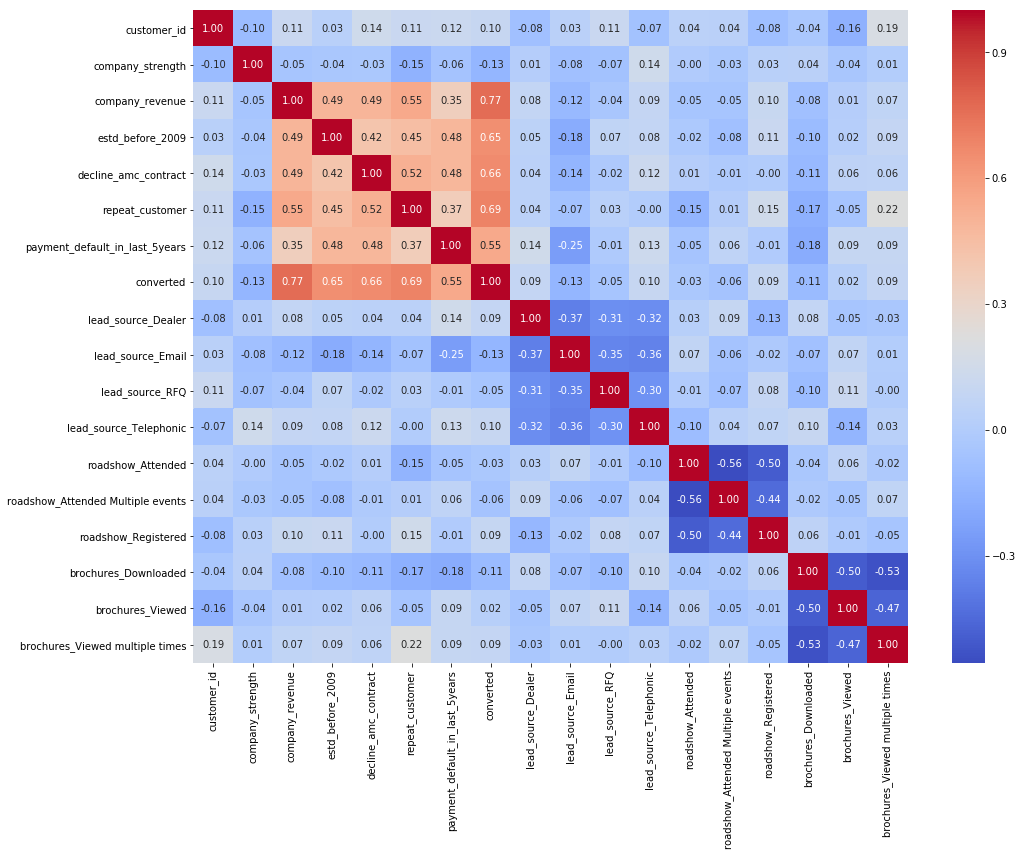

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [128]:
data_data=data.ix[:,(5,6,7,8,9,12,13,14,15,16,16,17,18,19,20,21)].values
y=data.ix[:,(11)].values
x=scale(data_data)
LogReg=LogisticRegression()
LogReg.fit(x,y)
#print (LogReg.score(x,y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

In [234]:
#Reading the csv file
new_data_file = r'test_data.csv'
new_data = pd.read_csv(new_data_file)
new_data

,customer_id,company_name,city,country,state,company_strength,company_revenue,estd_before_2009,decline_amc_contract,repeat_customer,phone_call,payment_default_in_last_5years,converted,lead_source_Dealer,lead_source_Email,lead_source_RFQ,lead_source_Telephonic,roadshow_Attended,roadshow_Attended Multiple events,roadshow_Registered,brochures_Downloaded,brochures_Viewed,brochures_Viewed multiple times
0,441,Goyette and Jones,Sparks,United States,Nevada,3610,6119799.45,1,1,1,Answered,0,1,0,0,0,1,0,1,0,1,0,0
1,116,JB,Austin,United States,Texas,4796,1711911.30,1,0,0,Answered,0,0,0,1,0,0,1,0,0,0,1,0
2,86,Wisoky,Madison,United States,Wisconsin,983,1165805.97,0,1,0,Call lasted more than 2+ minutes,1,1,0,0,0,1,1,0,0,0,1,0


In [237]:
new_data['company_name']

0     Goyette and Jones
1                    JB
2               Wisoky 
Name: company_name, dtype: object

In [0]:
new_data_ch=new_data.ix[:,(5,6,7,8,9,12,13,14,15,16,16,17,18,19,20,21)].values
#y=data.ix[:,(11)].values
c=scale(new_data_ch)

In [0]:
e=LogReg.predict_proba(c)


In [240]:
i=0
yes_array=[]
for value in e:
  print(e[i,0])
  yes_array.append(e[i,0])
  i+=1
  


0.16213775595333024
0.757533093615096
0.11032552471980306


In [241]:
df_toplot=pd.DataFrame({
    "probability for customer" : yes_array,
    "customer" : new_data['company_name']
    
})

df_toplot

,probability for customer,customer
0,0.162138,Goyette and Jones
1,0.757533,JB
2,0.110326,Wisoky


<BarContainer object of 3 artists>

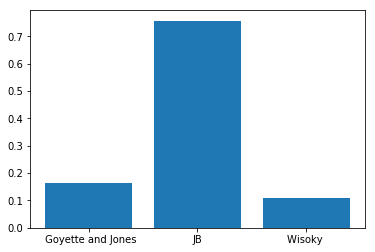

In [242]:
xaxis=df_toplot['probability for customer']
yaxis=df_toplot['customer']
plt.bar(yaxis,xaxis)